# Vector 2: Geometries, Spatial Operations and Visualization

UW Geospatial Data Analysis  
CEE498/CEWA599  
David Shean  

## Objectives
* Continue to explore GeoPandas functionality
* Explore basic geometry operations (e.g., buffer, intersect, union)
* Explore spatial filtering and spatial joins
* Explore new visualization approaches (e.g., hexbin, interactive maps)

Let's use the ICESat GLAS dataset one final time and cover some additional important vector concepts.

## Background

https://automating-gis-processes.github.io/site/notebooks/L1/geometric-objects.html

Take a look at the first few sections of the shapely manual: https://shapely.readthedocs.io/en/stable/manual.html

Many of these are implemented in GeoPandas, and they will operate over GeoDataFrame and GeoSeries objects:
https://geopandas.org/reference.html

These are common functions, and good to have in your toolkit for additional spatial analysis
If you've taken a GIS class, you've definitely encountered these, probably through some kind of vector toolkit

# Interactive Discussion
### GeoDataFrame vs. GeoSeries
* https://geopandas.org/data_structures.html
* Indexing and selection - `iloc`, `loc`
* Pandas `squeeze`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.squeeze.html

### Geometry objects
* POINT, LINE, POLYGON
* Polygon vs. MultiPolygon
* https://automating-gis-processes.github.io/site/notebooks/L1/geometric-objects.html

### GEOS geometry operations, as exposed by `shapely`
* GEOS https://trac.osgeo.org/geos/
* https://geopandas.org/geometric_manipulations.html
* Intersection
* Union
* Buffer

### Spatial joins with GeoPandas
* https://gisgeography.com/spatial-join/
* https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Visualization: Chloropleth and Heatmap
* https://geopandas.org/mapping.html

### Interactive plotting
* ipyleaflet, folium
* Basemap tiles with contextily

# Interactive Demo

In [ ]:
## Polygon creation
## Basic geometric operations on GeoDataFrame and Geometry objects

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona
#plt.rcParams['figure.figsize'] = [10, 8]

In [3]:
#%matplotlib widget
%matplotlib inline

## Opening up your Lab04 (Vector 1) notebook for reference
* Can also refer to the [solutions notebook](https://github.com/UW-GDA/gda_course_2021_solutions)

## Read in the gpkg of reprojected GLAS points
* Ideally, use the file with equal-area projection
* Note, you can right-click on a file in the Jupyterlab file browser, and select "Copy Path", then paste, but make sure you get the correct relative path to the new notebook (`../`)
* If you have issues with your file, you can recreate:
    * Read the original GLAS csv
    * Load into GeoDataFrame, define CRS (`'EPSG:4326'`)
    * Reproject with following PROJ string: `'+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'`

In [4]:
#Loading from Lab04
aea_fn = '../04_Vector1_Geopandas_CRS_Proj/conus_glas_aea.gpkg'
glas_gdf_aea = gpd.read_file(aea_fn)

/srv/conda/envs/notebook/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [5]:
#Recreating
aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'
csv_fn = '../01_Shell_Github/data/GLAH14_tllz_conus_lulcfilt_demfilt.csv'
glas_df = pd.read_csv(csv_fn)
glas_gdf = gpd.GeoDataFrame(glas_df, crs='EPSG:4326', geometry=gpd.points_from_xy(glas_df['lon'], glas_df['lat']))
glas_gdf_aea = glas_gdf.to_crs(aea_proj_str)

In [6]:
glas_gdf_aea

decyear        ordinal        lat         lon   glas_z    dem_z  \
0      2003.139571  731266.943345  44.157897 -105.356562  1398.51  1400.52   
1      2003.139571  731266.943346  44.150175 -105.358116  1387.11  1384.64   
2      2003.139571  731266.943347  44.148632 -105.358427  1392.83  1383.49   
3      2003.139571  731266.943347  44.147087 -105.358738  1384.24  1382.85   
4      2003.139571  731266.943347  44.145542 -105.359048  1369.21  1380.24   
...            ...            ...        ...         ...      ...      ...   
65231  2009.775995  733691.238340  37.896222 -117.044399  1556.16  1556.43   
65232  2009.775995  733691.238340  37.897769 -117.044675  1556.02  1556.43   
65233  2009.775995  733691.238340  37.899319 -117.044952  1556.19  1556.44   
65234  2009.775995  733691.238340  37.900869 -117.045230  1556.18  1556.44   
65235  2009.775995  733691.238341  37.902420 -117.045508  1556.32  1556.44   

       dem_z_std  lulc                         geometry  
0           0.33    31    POINT (709465.483 277418.898)  
1           0.43    31    POINT (709431.326 276549.914)  
2           0.28    31    POINT (709424.459 276376.270)  
3           0.84    31    POINT (709417.614 276202.405)  
4           1.73    31    POINT (709410.847 276028.547)  
...          ...   ...                              ...  
65231       0.00    31  POINT (-243698.930 -453031.309)  
65232       0.00    31  POINT (-243717.616 -452858.707)  
65233       0.00    31  POINT (-243736.378 -452685.769)  
65234       0.00    31  POINT (-243755.227 -452512.827)  
65235       0.00    31  POINT (-243774.072 -452339.774)  

[65236 rows x 9 columns]

## Create a variable to store the `crs` of your GeoDataFrame
* Quickly print this out to verify everything looks good

In [7]:
glas_gdf_aea.crs

<Projected CRS: +proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 + ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Albers Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
aea_crs = glas_gdf_aea.crs
aea_crs

<Projected CRS: +proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 + ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Albers Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Read in the state polygons

In [9]:
#states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json'
states_gdf = gpd.read_file(states_url)

<AxesSubplot:>

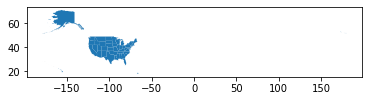

In [10]:
states_gdf.plot()

## Limit to Lower48

In [11]:
states_gdf['NAME']

0                    Maine
1            Massachusetts
2                 Michigan
3                  Montana
4                   Nevada
5               New Jersey
6                 New York
7           North Carolina
8                     Ohio
9             Pennsylvania
10            Rhode Island
11               Tennessee
12                   Texas
13                    Utah
14              Washington
15               Wisconsin
16             Puerto Rico
17                Maryland
18                 Alabama
19                  Alaska
20                 Arizona
21                Arkansas
22              California
23                Colorado
24             Connecticut
25                Delaware
26    District of Columbia
27                 Florida
28                 Georgia
29                  Hawaii
30                   Idaho
31                Illinois
32                 Indiana
33                    Iowa
34                  Kansas
35                Kentucky
36               Louisiana
3

In [12]:
idx = states_gdf['NAME'].isin(['Alaska','Puerto Rico','Hawaii'])

In [13]:
idx

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29     True
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
Name: NAME, dtype: bool

In [14]:
states_gdf = states_gdf[~idx]

<AxesSubplot:>

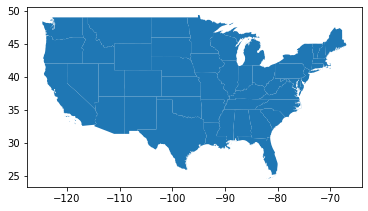

In [15]:
states_gdf.plot()

## Reproject the states to match the `crs` of your points

In [16]:
states_gdf_aea = states_gdf.to_crs(aea_crs)

## Create a quick plot to verify everything looks good
* Can re-use plotting code near the end of Lab04

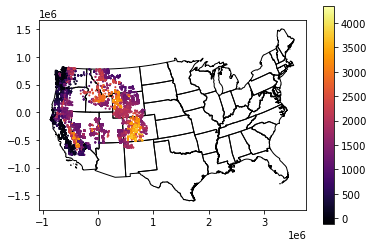

In [17]:
f, ax = plt.subplots()
states_gdf_aea.plot(ax=ax, facecolor='none', edgecolor='k')
glas_gdf_aea.plot(ax=ax, column='glas_z', cmap='inferno', markersize=1, legend=True);

## Extract the MultiPolygon geometry object for Washington from your reprojected states GeoDataFrame
* Use the state 'NAME' value to isolate the approprate GeoDataFrame record for Washington
* Assign the `geometry` attribute for this record to a new variable called `wa_geom`
    * This is a little tricky
    * After a boolean filter to get the WA record, you will need to use something like `iloc[0]` to extract a GeoSeries, and then isolate the `geometry` attribute
        * `wa_geom = wa_gdf.iloc[0].geometry`
    * Use the python `type()` function to verify that your output type is `shapely.geometry.multipolygon.MultiPolygon`

In [18]:
states_gdf_aea['NAME'] == 'Washington'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
17    False
18    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
Name: NAME, dtype: bool

In [19]:
# This is a new GeoDataFrame with one entry
wa_gdf = states_gdf_aea[states_gdf_aea['NAME'] == 'Washington']

In [20]:
type(wa_gdf)

geopandas.geodataframe.GeoDataFrame

In [21]:
wa_gdf.iloc[0]

GEO_ID                                              0400000US53
STATE                                                        53
NAME                                                 Washington
LSAD                                                           
CENSUSAREA                                              66455.5
geometry      (POLYGON ((-646918.4994006845 812457.693283123...
Name: 14, dtype: object

<AxesSubplot:>

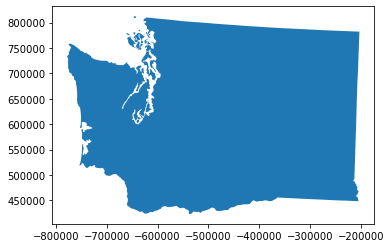

In [22]:
wa_gdf.plot()

<AxesSubplot:>

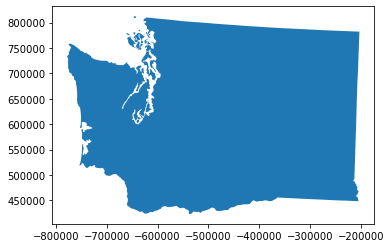

In [23]:
wa_gdf.plot()

In [24]:
wa_gdf

GEO_ID STATE        NAME LSAD  CENSUSAREA  \
14  0400000US53    53  Washington        66455.521   

                                             geometry  
14  MULTIPOLYGON (((-646918.499 812457.693, -64288...

In [26]:
wa_gdf.iloc[0]

GEO_ID                                              0400000US53
STATE                                                        53
NAME                                                 Washington
LSAD                                                           
CENSUSAREA                                              66455.5
geometry      (POLYGON ((-646918.4994006845 812457.693283123...
Name: 14, dtype: object

In [27]:
wa_gdf.squeeze()

GEO_ID                                              0400000US53
STATE                                                        53
NAME                                                 Washington
LSAD                                                           
CENSUSAREA                                              66455.5
geometry      (POLYGON ((-646918.4994006845 812457.693283123...
Name: 14, dtype: object

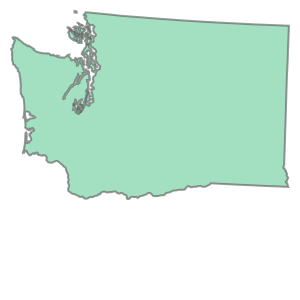

In [28]:
wa_gdf.geometry.squeeze()

In [29]:
# This is the Geometry object for that one entry
wa_geom = wa_gdf.squeeze().geometry

In [30]:
type(wa_geom)

shapely.geometry.multipolygon.MultiPolygon

## Inspect the Washington geometry object

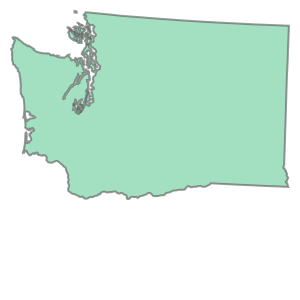

In [31]:
wa_geom

### What happens when you pass the geometry object to `print()`? (clear or hide the output, then summarize what happened)

In [32]:
print(wa_geom)

MULTIPOLYGON (((-646918.4994006845 812457.693283123, -642885.5256547192 812063.4839217928, -642146.8990386516 809220.775294781, -642669.653905671 808900.5628682857, -643573.2834588034 809367.3440305826, -645039.0748811929 809304.1762696018, -646720.8811980967 809560.633382762, -646651.5559314326 810711.0160155218, -646918.4994006845 812457.693283123)), ((-645363.0928161347 780668.0281821571, -644900.327490958 780993.483519935, -644161.2672345695 781027.0890552021, -644032.6470653641 780632.0959637008, -644130.2252544984 777910.3917836356, -644923.677983092 776948.1527977451, -645461.0872940731 776606.2033658311, -647078.5343999882 776130.7113067426, -646994.1321989537 776452.9626620131, -646479.3029195891 777148.6045498501, -646476.4931375748 777675.2825717158, -647198.3687706836 778383.3485780228, -648867.9576917526 779022.475983585, -646449.9126927532 780704.5774928473, -645363.0928161347 780668.0281821571)), ((-620939.9535822438 780369.1481067938, -619290.6601721802 776796.515645003

### What happens when you execute a notebook cell containing only the geometry object variable name? Oooh.

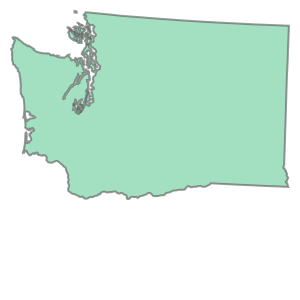

In [33]:
wa_geom

### What is the geometry type?

In [34]:
wa_geom.geom_type

'MultiPolygon'

In [35]:
wa_geom.bounds

(-778132.333047116, 423498.94480622106, -202928.00804218222, 812457.693283123)

In [36]:
wa_geom.area/1E6

175677.00188775448

In [38]:
#Explore other methods/attributes with tab completion
#wa_geom.

## Find the geometric center of WA state
* See the `centroid` attribute
* You may have to `print()` this to see the coordinates

In [39]:
#GeoDataFrame
#c = wa_gdf.centroid.iloc[0]
#MultiPolygon Geometry
c = wa_geom.centroid

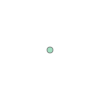

In [40]:
c

In [41]:
print(c)

POINT (-467006.7249887322 616237.527823739)


### How many individual polygons are contained in the WA geometry?  
* Hint: how would you get the number of elements in a standard Python tuple or list?  
* If more than one, why?

In [42]:
len?

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method


In [43]:
len(wa_geom)

33

## Cracking open the geometry collection

### Compute the area of each individual polygon
* Remember, this MultiPolygon object is iterable, so maybe list comprehension here?
* Store the output areas in a new list or array

In [44]:
poly_area = [x.area for x in wa_geom]
poly_area

[12379518.75068445,
 12991256.233926358,
 24272338.175023668,
 4004131.839015948,
 24380918.94184941,
 21931206.771757536,
 1766748.2423283516,
 448942912.00550205,
 174433620176.586,
 1227138.9592209058,
 6181712.652558142,
 884974.437173253,
 1514634.8294161027,
 14178854.35894247,
 854624.147908652,
 2404324.0202423627,
 1111242.824517926,
 1036956.0427847432,
 165175940.96050686,
 108864070.33596672,
 1777547.3002110578,
 2279438.556519745,
 107782786.49226111,
 1539432.3747005204,
 15696978.791081306,
 19303487.091404155,
 1126848.1736271207,
 24029813.488972027,
 1005053.7916225063,
 24339768.481058538,
 18315745.686246525,
 547686.7864612616,
 171533619.625025]

### Isolate and render the polygons that have min and max area
* Remember the NumPy `argmax` function? Maybe useful here...

In [45]:
maxidx = np.argmax(poly_area)
minidx = np.argmin(poly_area)

174433620176.586


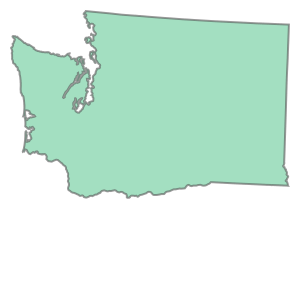

In [46]:
print(wa_geom[maxidx].area)
wa_geom[maxidx]

547686.7864612616


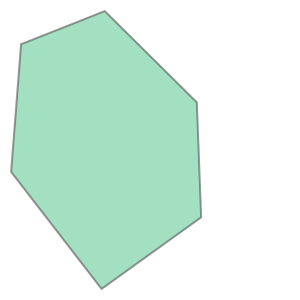

In [47]:
print(wa_geom[minidx].area)
wa_geom[minidx]

### How many vertices are in the largest polygon?
* Let's start by looking at the `exterior` ring of the largest polygon geometry
    * This is actually a line, so if you ever need to convert a polygon geometry to a line geometry, now you know it's easy! 
    * You should see an outline of WA state
* Now let's access the coordinates for this line geometry with `coords[:]`
    * This will return a list of (x,y) tuples for each vertex
* You already know how to determine the number of items in a list!

In [48]:
type(wa_geom[maxidx].exterior)

shapely.geometry.polygon.LinearRing

In [49]:
wa_geom[maxidx].exterior.coords[:]

[(-204651.4082504816, 448455.1569943838),
 (-206557.59729306458, 448610.0187180384),
 (-210049.9476956619, 448797.4457151319),
 (-215108.47747016462, 448945.3441236241),
 (-216555.16974960634, 449065.94951149286),
 (-227574.138577179, 449524.51866302843),
 (-227722.41742203714, 449529.48739169247),
 (-227892.12364201405, 449539.3153347549),
 (-237239.95193676994, 449900.5874855259),
 (-238506.1266184202, 449688.2832214154),
 (-241342.6226220005, 450041.21709338436),
 (-245146.04109260935, 450184.36225771933),
 (-247870.41892801534, 450203.01478372025),
 (-247886.96407641927, 450199.39919152134),
 (-248253.53186230682, 450214.75689228874),
 (-250163.25624990382, 450336.1819712902),
 (-257761.31319243024, 450690.1233688085),
 (-266621.43369016435, 451148.87057386653),
 (-288183.52513005555, 452151.9502788339),
 (-298176.49490151164, 452536.78764432995),
 (-298549.1104508215, 452553.30390111386),
 (-299706.7672100728, 452652.3540008381),
 (-306114.8112405424, 452913.42257779057),
 (-30670

In [50]:
#Preview first 10 vertices
wa_geom[maxidx].exterior.coords[:][0:10]

[(-204651.4082504816, 448455.1569943838),
 (-206557.59729306458, 448610.0187180384),
 (-210049.9476956619, 448797.4457151319),
 (-215108.47747016462, 448945.3441236241),
 (-216555.16974960634, 449065.94951149286),
 (-227574.138577179, 449524.51866302843),
 (-227722.41742203714, 449529.48739169247),
 (-227892.12364201405, 449539.3153347549),
 (-237239.95193676994, 449900.5874855259),
 (-238506.1266184202, 449688.2832214154)]

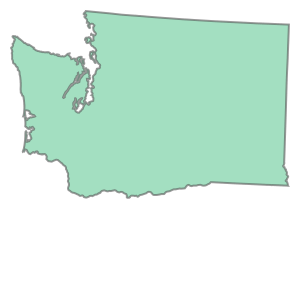

In [51]:
wa_geom[maxidx]

In [52]:
# Note -1 to remove repeated coord needed to close the polygon
len(wa_geom[maxidx].exterior.coords[:]) - 1

1385

## How many vertices in the smallest polygon?

In [53]:
len(wa_geom[minidx].exterior.coords[:]) - 1

6

### Take a look at the list of (x,y) coordinates in the smallest polygon
* What do you notice about the first and last coordinate?

In [54]:
wa_geom[minidx].exterior.coords[:]

[(-612362.0772370291, 755254.3062803438),
 (-612711.356809496, 755706.2025913041),
 (-612672.7866134546, 756199.1423657358),
 (-612349.8575319392, 756326.8794596688),
 (-611994.3244801961, 755974.6489008315),
 (-611977.5666374292, 755530.7225745408),
 (-612362.0772370291, 755254.3062803438)]

This is a closed polygon!  It starts and ends at the same point.  So technically, you have one less vertex than the total number of points in the polygon.

## Determine the perimeter of WA state in km
* This should be quick - just use an attribtue of the MultiPolygon geometry

In [55]:
wa_geom.length/1E3

3846.9053345353614

In [56]:
wa_geom[maxidx].exterior.length/1E3

3017.723150889463

## Explore the `simplify()` method for your MultiPolygon
* This can be very useful if you have complex geometry objects that require a lot of memory
    * Perhaps a line from a GPS track, or a polygon extracted from a raster with a vertex at each pixel
    * You can simplify, preserve almost all of the original information, and remove many (sometimes most) of the redundant/unnecessary vertices
* https://shapely.readthedocs.io/en/latest/manual.html#object.simplify
* Need to provide a `tolerance` in units of meters
    * Try 100, 1000, 10000, 100000
    * How does this affect the perimeter measurement?

In [57]:
def smart_simplify(geom, tol):
    newgeom = geom.simplify(tol)
    newvertcount = sum(len(x.exterior.coords[:]) for x in newgeom)
    gpd.GeoSeries(newgeom).plot(figsize=(4,3))
    print(tol, '%0.1f' % (newgeom.length/1E3), newvertcount)

Tolerance Perimieter Num vertices
100 3845.0 1826
1000 3715.0 569
10000 3244.6 213
100000 2609.7 169


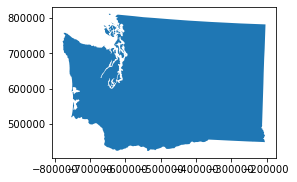

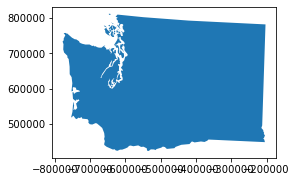

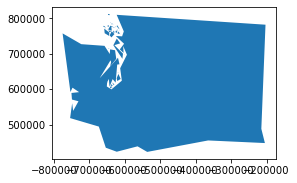

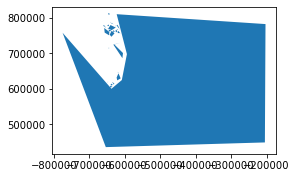

In [58]:
print("Tolerance", "Perimieter", "Num vertices")
for i in (100,1000,10000,100000):
    smart_simplify(wa_geom, i)

### Extra Credit: What percentage of the total WA state perimeter is from islands?

In [59]:
(1.0 - (wa_geom[maxidx].length / wa_geom.length))*100

21.554525301206795

## Unite the West Coast!
* Let's create a single Multipolygon for West Coast states: Washington, Oregon and California
* Start by extracting those states to a new GeoDataFrame - can use the `isin()` function for Pandas, which is similar to built-in `in` operation in Python

In [60]:
idx = states_gdf_aea['NAME'].isin(['Washington','Oregon','California'])
westcoast_gdf = states_gdf_aea[idx]
westcoast_gdf

GEO_ID STATE        NAME LSAD  CENSUSAREA  \
14  0400000US53    53  Washington        66455.521   
22  0400000US06    06  California       155779.220   
45  0400000US41    41      Oregon        95988.013   

                                             geometry  
14  MULTIPOLYGON (((-646918.499 812457.693, -64288...  
22  MULTIPOLYGON (((-717608.109 -426715.682, -7168...  
45  POLYGON ((-234637.247 260619.790, -234835.888 ...

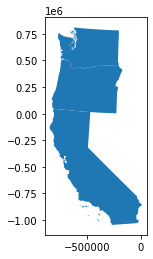

In [61]:
westcoast_gdf.plot();

## Combine the states as a single MultiPolygon geometry
* See the `unary_union` attribute 

In [62]:
westcoast_gdf.unary_union?

Type:        property
String form: <property object at 0x7fe474a784a0>
Docstring:  
Returns a geometry containing the union of all geometries in the
``GeoSeries``.


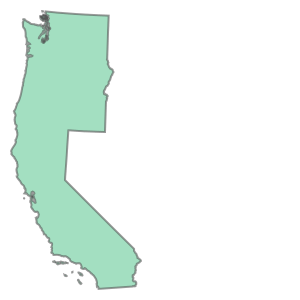

In [63]:
westcoast_geom = westcoast_gdf.unary_union
westcoast_geom

Note: If you have a column that classifies features in a GeoDataFrame (e.g., a column for `region` that contains `West Coast` and `East Coast`), you can also use `dissolve(by='region')` to create a new GeoDataFrame of merged polygons

## Now buffer the combined geometry
* Use a 50 km buffer

In [64]:
westcoast_geom.buffer?

Signature:
westcoast_geom.buffer(
    distance,
    resolution=16,
    quadsegs=None,
    cap_style=1,
    join_style=1,
    mitre_limit=5.0,
    single_sided=False,
)
Docstring:
Get a geometry that represents all points within a distance
of this geometry.

A positive distance produces a dilation, a negative distance an
erosion. A very small or zero distance may sometimes be used to
"tidy" a polygon.

Parameters
----------
distance : float
    The distance to buffer around the object.
resolution : int, optional
    The resolution of the buffer around each vertex of the
    object.
quadsegs : int, optional
    Sets the number of line segments used to approximate an
    angle fillet.  Note: the use of a `quadsegs` parameter is
    deprecated and will be gone from the next major release.
cap_style : int, optional
    The styles of caps are: CAP_STYLE.round (1), CAP_STYLE.flat
    (2), and CAP_STYLE.square (3).
join_style : int, optional
    The styles of joins between offset segments are:

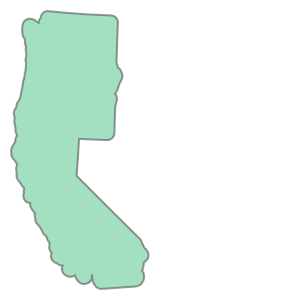

In [66]:
westcoast_geom_buff = westcoast_geom.buffer(50000)
westcoast_geom_buff

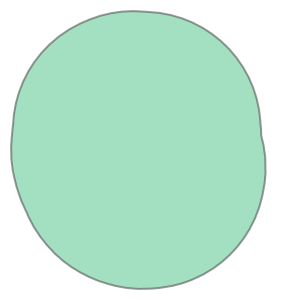

In [69]:
#Add some zeros
westcoast_geom.buffer(500000)
westcoast_geom.buffer(5000000)

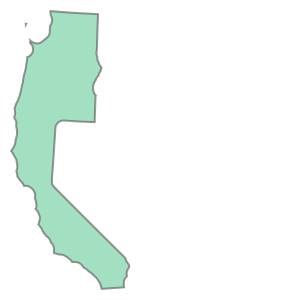

In [70]:
#Buffer distance can be negative
westcoast_geom_erode = westcoast_geom.buffer(-50000)
westcoast_geom_erode

## Use a `difference` operation to isolate the buffered region around the individual polygons
* This is sometimes useful if you need to extract statistics from another dataset

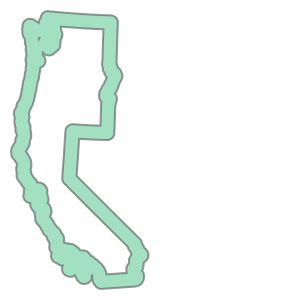

In [71]:
westcoast_geom_buff.difference(westcoast_geom_erode)

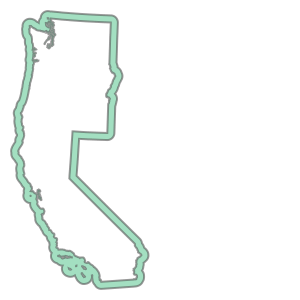

In [72]:
westcoast_geom_buff.difference(westcoast_geom)

### Somebody should put that on a t-shirt!

# Part 1: Geometric Operations for GLAS points

## Clip the GLAS points to Washington state polygon
* This should be pretty straightforward:
    * Identify records from the GLAS GeoDataFrame that `intersects` the WA state geometry
    * Extract those records and store in a new GeoDataFrame
* This may take 5-10 seconds to complete

## Compute some statistics for the WA state GLAS points
* How many points are in WA state?
* What is mean `glas_z` elevation in WA state?

## Plot the resulting points
* Add the WA polygon outline
    * Note that you don't need/want to use the Polygon Geometry object here.  Remember, you have a GeoDataFrame containing just the WA geometry.  And you know how to plot GeoDataFrames.
* Add the WA state centroid you calculated earlier using a distinct marker style (e.g., `'*'` or `'x'`)
    * Can use simple matplotlib `plot` with the coordinates, or can use `wa_gdf.centroid.plot()`

## Find the GLAS point closest to the WA state centroid
* See the GeoDataFrame `distance` function
* Create a plot showing this distance for each GLAS point.
* What is the total offset between this point and the centroid in km?
* Extra Credit: Do a quick calculation using the Pythagorean theorem to determine Euclidian distance between the centroid and this point - does this match the output of the `distance` function?

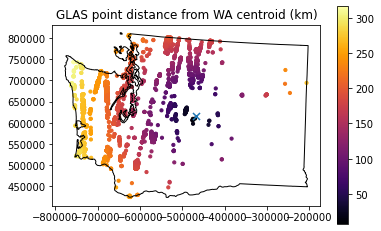

## What is the `glas_z` value of this point?

## Extra Credit: Which GLAS point is farthest from the WA state perimeter?
* Note that this is different than the above calcuations for point to point distance, you're looking for point to polyline distance
* What is the distance in km?
* This should be pretty straightforward, combining elements from the above questions/demo
* This can be useful to consider distance from the coast and climatology (temperature, precipitation and other environmental variables) 

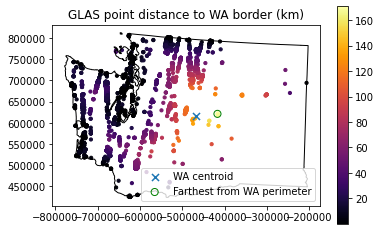

# Part 2: Aggregate GLAS points for state polygons and compute `glas_z` statistics

OK, we computed some stats for GLAS points within WA state.  Now let's find the GLAS points that intersect **each** state polygon. 

Objectives:
1. Compute the count of points and mean `glas_z` elevation for each state
2. Generate cloropleth maps for both

One approach would be to loop through each state polygon, and do an intersection operation like we did for WA state above.  But this is inefficient, and doesn't scale well.  It is much more efficient to do a spatial join between the points and the polygons with the intersection operator, then groupby and aggregate to compute the relevant statistics for each state.

You may have learned how to perform a join or spatial join in a GIS class.  So, do we need to open ArcMap or QGIS here?  Do we need a full-fledged spatial database like PostGIS?  No!  GeoPandas has you covered.

## Start with a spatial join between the GLAS points and state polygons
* Start by reviewing the Spatial Join documentation here: http://geopandas.org/mergingdata.html
* Use the geopandas `sjoin` method: http://geopandas.org/reference/geopandas.sjoin.html

## Let's extract the columns that matter
* Since we only care about `glas_z` values here let's create some smaller GeoDataFrames:
    * Extract the `['glas_z', 'geometry']` columns from the GLAS GeoDataFrame
    * Extract the `['NAME', 'geometry']` columns from the states GeoDataFrame

In [61]:
glas_gdf_aea_lite = glas_gdf_aea[['glas_z', 'geometry']]
states_gdf_aea_lite = states_gdf_aea[['NAME','geometry']]

## Now try a spatial join between these two 
* Use the GLAS points as the "left" GeoDataFrame and the States as the "right" GeoDataFrame
* Start by using default options (`op='intersects', how='inner'`)
* Note the output geometry type and columns

glas_z                        geometry  index_right        NAME
0      1398.51   POINT (709465.483 277418.898)           50     Wyoming
1      1387.11   POINT (709431.326 276549.914)           50     Wyoming
2      1392.83   POINT (709424.459 276376.270)           50     Wyoming
3      1384.24   POINT (709417.614 276202.405)           50     Wyoming
4      1369.21   POINT (709410.847 276028.547)           50     Wyoming
...        ...                             ...          ...         ...
64091  1868.30  POINT (485179.859 -614501.598)           31  New Mexico
64499  1701.32  POINT (531778.415 -627890.213)           31  New Mexico
64500  1735.44  POINT (531666.256 -629442.175)           31  New Mexico
8377   1362.41   POINT (87991.625 -555886.651)            2     Arizona
60425  1348.03   POINT (87811.448 -556041.104)            2     Arizona

[63850 rows x 4 columns]

## Now reverse the order of the two input GeoDataFrames
* Use default options again

## Which one makes more sense?
* Remember, we're trying to add a State name to each GLAS point
* You'll need to decide which one to use moving forward 

## Extra credit
Experiment with a few different operations (`op`) for the spatial join (e.g., `intersects`) and review the output with `head()`
* Descriptions of different operations are here: https://shapely.readthedocs.io/en/stable/manual.html#object.intersects
    * Note that for our input spatial join of points and polygons, some of the details are irrelevant
* Do you notice a difference in the output number of records?
* Choose the `how` keyword appropriately:
    * Test a few options and note the output number of records
    * Are there any points that don't fall within a state polygon?  Why might this be?  Do you want to preserve these moving forward?

## Sanity check
* Run a `head` on our new GeoDataFrame
* For each GLAS point, there should be a new column with the corresponding state NAME
* Check the original and joined `shape`
    * Does the number of records equal the original number of GLAS points?
    * Why might they be different?

glas_z                       geometry  index_right     NAME
0  1398.51  POINT (709465.483 277418.898)           50  Wyoming
1  1387.11  POINT (709431.326 276549.914)           50  Wyoming
2  1392.83  POINT (709424.459 276376.270)           50  Wyoming
3  1384.24  POINT (709417.614 276202.405)           50  Wyoming
4  1369.21  POINT (709410.847 276028.547)           50  Wyoming

## Now aggregate by state `NAME`
* Note: the GeoPandas doc example uses a `dissolve` operation here, which is a wrapper around the `groupby` and `agg` Pandas functions
    * https://geopandas.org/aggregation_with_dissolve.html
* But look at the geometry column for the points in your GeoDataFrame.  The `dissolve` is going to compute the union for the points in each state and return a `MultiPoint` Geometry for each state, which we don't really want/need.  It will also take longer to run.
* Instead, let's try a `groupby` operation for the `NAME` column, and then `agg` with a list of functions we care about: `['count', 'mean']` (statitiscs for point count and mean point elevation for each state)

glas_z              index_right     
            count         mean       count mean
NAME                                           
Arizona         2  1355.220000           2    2
California  13865  1701.699116       13865    4
Colorado     8429  3253.791521        8429    5
Idaho        7297  1790.290550        7297   12
Montana      2658  2125.944759        2658   26
Nevada      12081  1335.431521       12081   28
New Mexico    209  1835.156699         209   31
Oregon       2838  1500.335525        2838   37
Utah         5498  1439.914989        5498   44
Washington   5265  1224.196596        5265   47
Wyoming      5708  2106.420340        5708   50

## Sanity check
* That groupby and agg should be pretty fast (~1-2 seconds)
* Check the `type()` of the output
* Since `groupby` and `agg` are Pandas operation, you should now have a new Pandas `DataFrame` (not a GeoPandas `GeoDataFrame`) with index of state names and columns for `count` and `mean` values in each state

## Simplify the Heirarchical Index
* However, you may have noticed that you now have a "heirarchical index", with `count` and `mean` columns for both `glas_z` and `index_right`.
    * More info on this is here: https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html.  
    * This can be confusing at first, but is actually a powerful feature of Pandas.
    * For our situation, we don't care about `index_right` (byproduct of our spatial join), so you can simplify by extracting only the `glas_z` values
        * Do this the way you would extract a column from a standard DataFrame: `my_agg_df['glas_z']` and store as a new DataFrame
        * You can now directly access the `count` and `mean` columns

# Part 3: Plots!
* How are we going to visualize these data?
* We have `count` and `mean` of GLAS points for each state!  Objective #1 complete!
* We now want to visualize these values, but we lost our state Polygon/MultiPolygon Geometry along the way
* No problem, we can combine our DataFrame with the original State GeoDataFrame
    * Can use `merge` to do an attribute join on the shared state `'NAME'` index for the two
        * Take a moment to review the `my_agg_df.merge?` options
        * In this case, we have a common `NAME` field, so we can use the `on='NAME'` here for attribute join
    * Careful about the order of the two inputs here (state GeoDataFrame and the DataFrame with your stats) - you want to preserve the index and geometry of the GeoDataFrame, adding the `count` and `mean` columns.
        * If you get it right, you should be able to `plot()` the GeoPandas GeoDataFrame and get a map.  If you got it backwards, the output of `plot()` will be a line plot for the regular Pandas DataFrame

NAME                                           geometry  count  \
0      Arizona  POLYGON ((154103.502 -554865.569, 154463.722 -...      2   
1   California  MULTIPOLYGON (((-715337.404 -425936.004, -7153...  13865   
2     Colorado  POLYGON ((676361.242 -79930.861, 687165.323 -7...   8429   
3        Idaho  POLYGON ((261921.702 118654.345, 261929.542 11...   7297   
4      Montana  POLYGON ((724628.849 373437.826, 721641.649 37...   2658   
5       Nevada  POLYGON ((19102.023 -111459.675, 19082.720 -13...  12081   
6   New Mexico  POLYGON ((788203.103 -1070451.319, 778535.190 ...    209   
7       Oregon  POLYGON ((-594594.782 433232.266, -593459.687 ...   2838   
8         Utah  POLYGON ((269119.721 -78373.504, 270165.794 -1...   5498   
9   Washington  MULTIPOLYGON (((-612752.940 729560.713, -61302...   5265   
10     Wyoming  POLYGON ((353778.866 -103059.499, 347654.788 -...   5708   

           mean  
0   1355.220000  
1   1701.699116  
2   3253.791521  
3   1790.290550  
4   2125.944759  
5   1335.431521  
6   1835.156699  
7   1500.335525  
8   1439.914989  
9   1224.196596  
10  2106.420340

## Create a cloropleth map to visualize the count of GLAS points in each state
* https://geopandas.readthedocs.io/en/latest/mapping.html#choropleth-maps

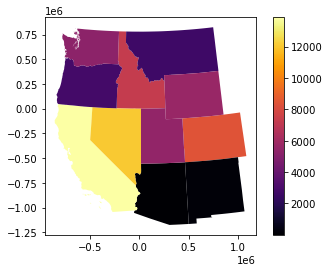

## Create a cloropleth map to visualize the mean elevation GLAS points in each state

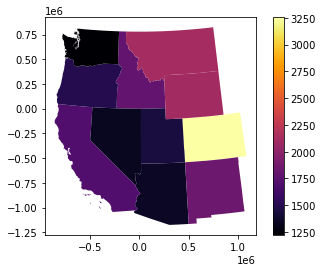

# Part 4: Point Densitiy Visualization: Hexbin plots

OK, now we have statistics and plots for our existing polygons.  But what if we want to compute similar statistics for a regularly spaced grid of cells?  For our `count`, this will give us point density, allowing for better visualization of the spatial distribution.

We could define a set of adjacent rectangular polygons, and repeat our `sjoin`, `groupby`, `agg` sequence above.  Or we can use some existing matplotlib functionality, and create a hexbin plot!

Hexagonal cells are preferable over a standard square/rectangular grid for various reasons: https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/h-whyhexagons.htm

Here are some resources on generating hexbins using Python and matplotlib:
* https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hexbin.html
* http://darribas.org/gds15/content/labs/lab_09.html

*Note: an equal-area projection is always good idea for a hexbin plot.  Fortunately, we started with our AEA projection, so we're all set!*

## Create a hexbin that shows the number of points in each cell
* Play around with the `gridsize` option to set the number of bins in each dimension (or specify the dimensions of your bins)
* Use the `mincnt` option to avoid plotting cells with 0 count
* Overlay the state polygons to help visualize
* Set your plot `xlim` and `ylim` to the GLAS point bounds
* Can use linear color ramp with vmin and vmax options, or try a logarithmic color ramp, since we have a broad range of counts

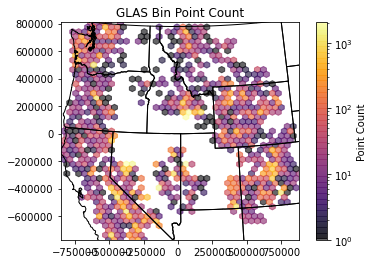

## Create a second hexbin plot that shows the median elevation in each cell
* See documentation for the `C` and `reduce_C_function` options

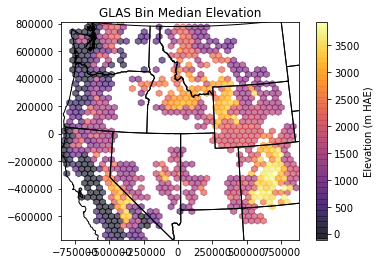

## Extra Credit: Generate a Kernel Density Estimator (KDE) plot using `seaborn`
* This is another nice approach to estimate the point density on a continuous grid
* https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
* https://seaborn.pydata.org/tutorial/distributions.html

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


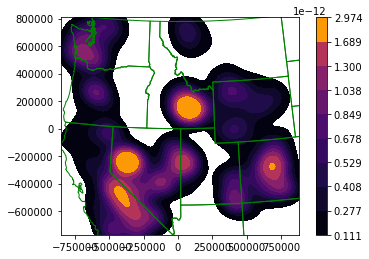

## Static plots with tiled basemaps using `contextily`
* Our state outlines provide some context for our plots, but what if we want a raster map background
* Can use the convenientt `contextily` package for this: https://github.com/geopandas/contextily

In [81]:
import contextily as ctx

### Using the default basemap projection
* Freely available tiled web maps are great: https://en.wikipedia.org/wiki/Tiled_web_map
* Most tiled basemaps use a standard "web mercator" projection (EPSG:3857)
* For this example, we will reproject our point GeoDataFrame to match the default tiles

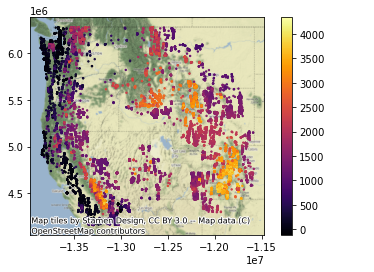

In [95]:
f, ax = plt.subplots()
#Convert points to web mercator projection and plot
glas_gdf_aea.to_crs('EPSG:3857').plot(ax=ax, column='glas_z', cmap='inferno', markersize=2, legend=True)
#Add basemap
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.Terrain)

### Using our custom projected coordinate system
* The contextily package also supports simple tile warping into arbitrary projections: https://contextily.readthedocs.io/en/latest/warping_guide.html
* We will revisit raster reprojection during the Raster 2 lab, but for now, enjoy the simplicity!

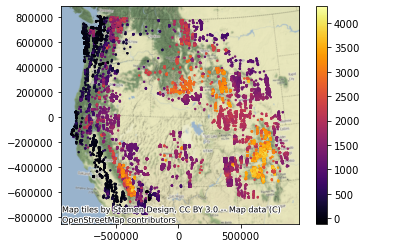

In [96]:
import contextily as ctx
f, ax = plt.subplots()
#Convert points to web mercator projection and plot
glas_gdf_aea.plot(ax=ax, column='glas_z', cmap='inferno', markersize=2, legend=True)
#Add basemap, specifying crs keyword
ctx.add_basemap(ax=ax, crs=glas_gdf_aea.crs, source=ctx.providers.Stamen.Terrain)

## Plot the WA points
* Explore different zoom levels
* Try at least one additional different ctx.provider

# Part 5: Interactive plots
## folium
* We haven't discussed as a class yet, but this is a simple, effective interactive visualization package (alternative to matplotlib)
* See the example here: https://python-visualization.github.io/folium/quickstart.html
* For your plot:
    * Isolate points to WA state for now, convert to EPSG:4326
    * Compute the centroid of the WA state polygon (remember GeoPandas `unary_union`) in EPSG:4326
    * Create a map object centered on this centroid
        * Use the 'Stamen Terrain' basemap layer
        * Experiment with `zoom_start` level to find a good extent
    * Export your WSG84 GeoDataFrame using `to_json()`, then load all features using `folium.features.GeoJson`
    * Add the points to the map
* Take a moment to explore this interactive map interface.

In [84]:
#Compute WA state centroid in WGS84
#wa_center_wgs84 = list(wa_gdf.to_crs('EPSG:4326').centroid.iloc[0].coords)[0][::-1]
wgs_c = wa_gdf.to_crs('EPSG:4326').unary_union.centroid
wa_center_wgs84 = (wgs_c.y, wgs_c.x)
wa_center_wgs84

(47.38198786066983, -120.45228413717675)

In [85]:
#Reproject to WGS84
glas_gdf_wa = glas_gdf_aea_wa.to_crs('EPSG:4326')

In [86]:
import folium
m = folium.Map(location=wa_center_wgs84, zoom_start=7, tiles='Stamen Terrain')
folium.features.GeoJson(glas_gdf_wa.to_json()).add_to(m)
m

### OK, but performance isn't great with so many points
* Use a `MarkerCluster` object here to cluster nearby points at each zoom level
* This example is likely useful: https://ocefpaf.github.io/python4oceanographers/blog/2015/12/14/geopandas_folium/

In [87]:
from folium.plugins import MarkerCluster
m = folium.Map(location=wa_center_wgs84, tiles='Stamen Terrain', zoom_start=7)
#Create clustered map with popups
locations, popups = [], []
for idx,row in glas_gdf_wa.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])
    popups.append(idx)
t = folium.FeatureGroup(name='GLAS')
t.add_child(MarkerCluster(locations=locations, popups=popups))
m.add_child(t)
m

## ipyleaflet

ipyleaflet is similar to folium.

Note that leaflet uses tiled basemaps: https://en.wikipedia.org/wiki/Tiled_web_map 

Default projection is Web Mercator (EPSG:3857): https://en.wikipedia.org/wiki/Web_Mercator_projection.  This works well for lower latitudes, but not the polar regions.  I know QGIS and contextily can reproject tiled basemaps on the fly - I haven't tested with ipyleaflet.

In [88]:
import ipyleaflet

In [89]:
#So many basemap options
ipyleaflet.basemaps.keys()

dict_keys(['OpenStreetMap', 'OpenTopoMap', 'Hydda', 'Esri', 'HikeBike', 'MtbMap', 'CartoDB', 'NASAGIBS', 'Strava', 'Stamen'])

In [90]:
#Aaaand, I ran out of time...

# Extra Credit

### Create a function to identify the 3 closest points to each GLAS point 
* Then use these 3 points to:
    - Define a plane
    - Calculate the elevation on that planar surface at the original GLAS point coordinates
    - Compute the difference between the observed GLAS elevation and the interpolated elevation 
    
### For each GLAS point, compute mean and std for all points within a 10 km radius
* Can potentially create buffer around the point, then intersect with all points
* Can compute distance to all points, then threshold

### Load the Randolph Glacier Inventory polygons and do a spatial join with ICESat points (https://www.glims.org/RGI/).